In [54]:
import numpy as np
import matplotlib.pyplot as plt
import os
plt.style.use('./deeplearning.mplstyle')

In [55]:
# --- Real dataset: Ames Housing (Dean De Cock, public domain) ---
# We use:
#   Feature: GrLivArea (Above grade living area square feet)
#   Target : SalePrice (property sale price in USD)
#
# Source CSV (mirrored public copy): 
#   https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/refs/heads/main/datasets/ames_housing_no_missing.csv
#
# We take a reproducible sample of 200 rows.

import pandas as pd
import numpy as np

DATA_URL = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/refs/heads/main/datasets/ames_housing_no_missing.csv"

try:
    df = pd.read_csv(DATA_URL)
    # Standard column names in this copy: 'Gr Liv Area' and 'SalePrice'
    # Keep only needed columns and drop missing
    subset = (
        df[['GrLivArea', 'SalePrice']]
        .dropna()
    )
    
    # Reproducible sample of 200
    sample = subset.sample(n=200, random_state=42)
    
    # Convert:
    # x in thousands of square feet for scale consistency
    # y in thousands of dollars (matches original notebook convention)
    x_train = (sample['GrLivArea'].values.astype(float) / 1000.0)
    y_train = (sample['SalePrice'].values.astype(float) / 1000.0)
    
    # Sort by x for nicer plots (optional)
    sort_idx = np.argsort(x_train)
    x_train = x_train[sort_idx]
    y_train = y_train[sort_idx]
    
    print("Loaded real housing sample (Ames) with 200 examples.")
except Exception as e:
    print(f"Data download failed ({e}). Falling back to small synthetic dataset.")
    x_train = np.array([1.0, 2.0])
    y_train = np.array([300.0, 500.0])

print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

Loaded real housing sample (Ames) with 200 examples.
x_train = [0.48  0.52  0.605 0.63  0.63  0.767 0.768 0.78  0.8   0.804 0.816 0.827
 0.848 0.848 0.848 0.854 0.864 0.864 0.872 0.874 0.882 0.882 0.886 0.894
 0.9   0.901 0.907 0.912 0.928 0.935 0.935 0.936 0.938 0.95  0.952 0.954
 0.955 0.974 0.987 0.988 0.988 0.988 0.99  1.008 1.012 1.026 1.028 1.034
 1.04  1.04  1.04  1.044 1.056 1.056 1.068 1.073 1.077 1.077 1.092 1.099
 1.117 1.118 1.126 1.134 1.136 1.144 1.15  1.176 1.18  1.199 1.211 1.216
 1.234 1.246 1.247 1.252 1.258 1.265 1.291 1.304 1.306 1.308 1.316 1.317
 1.34  1.343 1.348 1.352 1.36  1.365 1.368 1.375 1.389 1.393 1.4   1.412
 1.43  1.431 1.432 1.452 1.453 1.456 1.456 1.458 1.476 1.477 1.478 1.479
 1.487 1.498 1.5   1.506 1.513 1.522 1.524 1.526 1.535 1.535 1.548 1.556
 1.559 1.567 1.573 1.573 1.582 1.588 1.59  1.6   1.604 1.62  1.62  1.629
 1.636 1.646 1.654 1.657 1.664 1.664 1.689 1.69  1.694 1.702 1.71  1.717
 1.718 1.72  1.732 1.734 1.739 1.742 1.768 1.768 1.775 1.776 

In [56]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (200,)
Number of training examples is: 200


In [57]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 200


In [58]:
i = 1 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(1), y^(1)) = (0.52, 68.5)


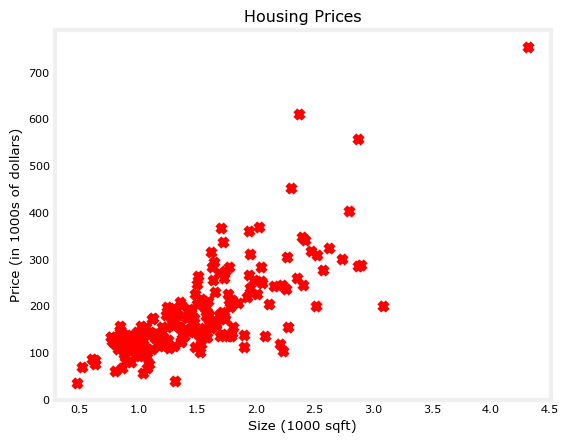

In [59]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

In [60]:
w = 200
b = -100
print(f"w: {w}")
print(f"b: {b}")

w: 200
b: -100


In [61]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

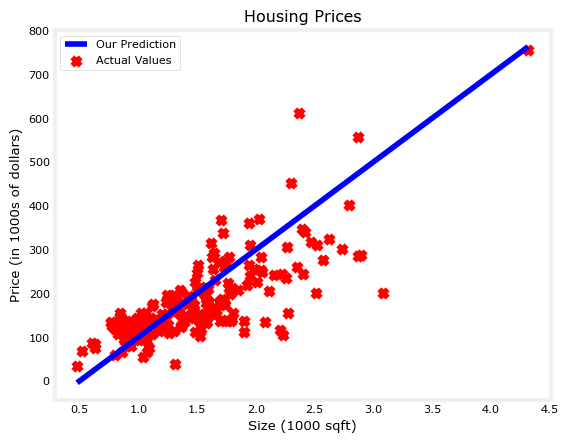

In [62]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

In [ ]:
# Evaluate cost and metrics for current linear model (w, b) on training data
import numpy as np

# predictions (in same units as y_train)
preds = compute_model_output(x_train, w, b)

# number of examples
m = x_train.shape[0]

cost = np.sum((preds - y_train)**2) / (2.0 * m)
# numpy-based MSE/RMSE
mse = np.mean((preds - y_train)**2)
rmse = np.sqrt(mse)
# R^2 = 1 - SS_res / SS_tot
ss_res = np.sum((y_train - preds)**2)
ss_tot = np.sum((y_train - np.mean(y_train))**2)
r2 = 1.0 - (ss_res / ss_tot) if ss_tot != 0 else float('nan')

print(f"m (examples) = {m}")
print(f"Cost (1/(2m) sum sq) = {cost:.4f}")
print(f"MSE = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R^2 = {r2:.4f}")

m (examples) = 200
Cost (1/(2m) sum sq) = 2780.2784
MSE = 5560.5568
RMSE = 74.5691
R^2 = 0.3513


In [52]:
w = 200                         
b = -100    
x_i = 3.85
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$670 thousand dollars
